<a href="https://colab.research.google.com/github/BinaryNavigator07/Network-Intrusion-Detection-System/blob/main/CICIDS%202017/2017_feature_extraction_with_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Install dependencies
!pip install kagglehub[pandas-datasets] --quiet

# Import libraries
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Example: CICIDS2017 dataset on Kaggle
# Dataset: https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset
dataset_slug = "chethuhn/network-intrusion-dataset"

# Example file from the dataset — adjust to what you want
# You can view available files after first download with kagglehub.list_files()
file_path = "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"

# Load the CSV into a pandas DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    dataset_slug,
    file_path
)

# Show basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 records:")
print(df.head())


/tmp/ipython-input-4071481334.py:17: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 17.8M/17.8M [00:00<00:00, 74.6MB/s]

Extracting zip of Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv...


Shape of dataset: (225745, 79)

First 5 records:
    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   

In [20]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
np.random.seed(178)

In [21]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [22]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [24]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [25]:
df[' Label'].nunique()

2

### Data Cleaning

In [26]:

from itertools import combinations

def data_cleaning(df):
    df.columns=df.columns.str.strip()
    print("Dataset Shape: ",df.shape)

    num=df._get_numeric_data()
    num[num<0]=0

    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols,axis=1,inplace=True)
    print("Zero Variance Columns: ",zero_variance_cols, " are dropped!!")
    print("Shape after removing the zero variance columns: ",df.shape)

    df.replace([np.inf,-np.inf],np.nan,inplace=True)
    print(df.isna().any(axis=1).sum(), "rows dropped")
    df.dropna(inplace=True)
    print("Shape after Removing NaN: ",df.shape)

    df.drop_duplicates(inplace=True)
    print("Shape after dropping duplicates: ",df.shape)

    column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
    ide_cols=[]
    for col_pair in column_pairs:
        ide_cols.append(col_pair[1])
    df.drop(columns=ide_cols,axis=1,inplace=True)
    print("Columns which have identical values: ",column_pairs," dropped!")
    print("Shape after removing identical value columns: ",df.shape)
    return df
df=data_cleaning(df)

Dataset Shape:  (225745, 79)
Zero Variance Columns:  ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']  are dropped!!
Shape after removing the zero variance columns:  (225745, 69)
34 rows dropped
Shape after Removing NaN:  (225711, 69)
Shape after dropping duplicates:  (223082, 69)
Columns which have identical values:  [('Total Fwd Packets', 'Subflow Fwd Packets'), ('Total Backward Packets', 'Subflow Bwd Packets'), ('Total Length of Fwd Packets', 'Subflow Fwd Bytes'), ('Total Length of Bwd Packets', 'Subflow Bwd Bytes'), ('Fwd Packet Length Mean', 'Avg Fwd Segment Size'), ('Fwd PSH Flags', 'SYN Flag Count'), ('Fwd Header Length', 'Fwd Header Length.1'), ('RST Flag Count', 'ECE Flag Count')]  dropped!
Shape after removing identical value columns:  (223082, 61)


In [27]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count'

In [28]:
df['Label'].value_counts()

,count
Label,
DDoS,128014
BENIGN,95068


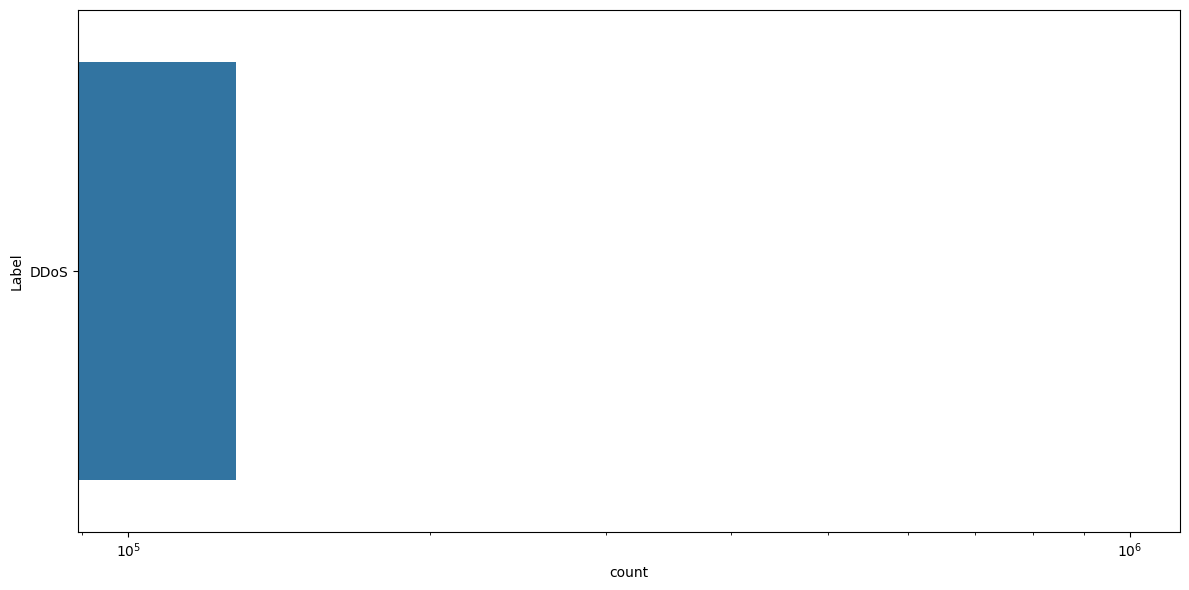

In [30]:
# Install Seaborn if not already installed
!pip install seaborn --quiet

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Make sure 'Label' column exists in your DataFrame
plot = sns.countplot(
    data=df.loc[df['Label'] != 'BENIGN'],
    y='Label'
)

plt.xscale('log')
plt.tight_layout()

# Save the plot
fig = plot.get_figure()
fig.savefig('img1.png')

plt.show()

### Data Normalization

In [32]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# For compatibility with scikit-learn 1.2+
try:
    encoder = OneHotEncoder(sparse_output=False)
except TypeError:  # For older versions
    encoder = OneHotEncoder(sparse=False)

y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))
y_encoded = pd.DataFrame(y_encoded)

print(y_encoded.head())


     0    1
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0


In [33]:
X_scaled

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.837225,2.500001e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.840109,9.083338e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.840124,4.333336e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705548,2.833335e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.837194,2.500001e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223077,0.936550,5.083336e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223078,0.936611,6.000003e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223079,0.936565,6.250003e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223080,0.935772,4.000002e-07,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
y_encoded

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
223077,1.0,0.0
223078,1.0,0.0
223079,1.0,0.0
223080,1.0,0.0


In [35]:
# Combine the scaled features and the one-hot encoded label
df = pd.concat([X_scaled, y_encoded], axis=1)
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,0,1
0,0.837225,2.500001e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.840109,9.083338e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.840124,4.333336e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.705548,2.833335e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.837194,2.500001e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223077,0.936550,5.083336e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
223078,0.936611,6.000003e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
223079,0.936565,6.250003e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
223080,0.935772,4.000002e-07,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_encoded,test_size=0.2)
print(X_train.shape," ",X_test.shape)
print(y_train.shape," ",y_test.shape)

(178465, 60)   (44617, 60)
(178465, 2)   (44617, 2)


In [37]:
X_train

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
217396,0.006760,0.046764,0.002589,0.001020,0.003339,0.000032,0.044264,0.000000,0.026334,0.030527,...,0.002589,0.384615,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000,0.000
116926,0.001221,0.012742,0.001554,0.000000,0.000131,0.000000,0.000514,0.004076,0.001552,0.000000,...,0.001554,0.384615,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000,0.000
16482,0.000809,0.205385,0.000518,0.000680,0.000525,0.000044,0.004195,0.031929,0.012413,0.000211,...,0.000518,0.384615,0.000233,0.0,0.000233,0.000233,0.205,0.0,0.205,0.205
30433,0.001221,0.004444,0.001036,0.001360,0.000142,0.002243,0.001712,0.000000,0.002241,0.001534,...,0.001036,0.384615,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000,0.000
43625,0.001221,0.004361,0.001036,0.002039,0.000142,0.002243,0.001712,0.000000,0.002241,0.001534,...,0.001036,0.384615,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133390,0.001221,0.010109,0.001036,0.002039,0.000142,0.002244,0.001712,0.000000,0.002241,0.001534,...,0.001036,0.384615,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000,0.000
151955,0.001221,0.000939,0.001036,0.001360,0.000142,0.002243,0.001712,0.000000,0.002241,0.001534,...,0.001036,0.384615,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000,0.000
153708,0.000809,0.000001,0.000518,0.000680,0.000382,0.000020,0.002997,0.023777,0.009051,0.000000,...,0.000518,0.384615,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000,0.000
143887,0.001221,0.000058,0.002071,0.000000,0.000164,0.000000,0.000514,0.004076,0.001552,0.000000,...,0.002071,0.384615,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000,0.000


In [38]:
X_test

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
68202,0.000809,0.001276,0.000518,0.000680,0.000426,0.000050,0.003339,0.026495,0.010085,0.000000,...,0.000518,0.769231,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
67381,0.001221,0.660152,0.003625,0.001700,0.000306,0.002244,0.001712,0.000000,0.001810,0.000845,...,0.003107,0.384615,0.021379,0.0,0.021379,0.021379,0.635000,0.0,0.635000,0.635000
128079,0.839727,0.006265,0.003107,0.000680,0.063422,0.000005,0.500000,0.000000,0.428793,0.363130,...,0.002589,0.384615,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
171484,0.001221,0.005223,0.001036,0.001360,0.000142,0.002243,0.001712,0.000000,0.002241,0.001534,...,0.001036,0.384615,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
150345,0.001221,0.001693,0.001036,0.001700,0.000142,0.002243,0.001712,0.000000,0.002241,0.001534,...,0.001036,0.384615,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35640,0.001221,0.079357,0.002071,0.000000,0.000164,0.000000,0.000514,0.004076,0.001552,0.000000,...,0.002071,0.384615,0.000050,0.0,0.000050,0.000050,0.079316,0.0,0.079316,0.079316
215273,0.001221,0.003477,0.001036,0.001360,0.002421,0.000177,0.037928,0.000000,0.038186,0.038216,...,0.000518,0.615385,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
74807,0.001221,0.654316,0.003625,0.002039,0.000306,0.002243,0.001712,0.000000,0.001810,0.000845,...,0.003107,0.384615,0.001120,0.0,0.001120,0.001120,0.653333,0.0,0.653333,0.653333
96646,0.001221,0.000212,0.001036,0.002039,0.000142,0.002244,0.001712,0.000000,0.002241,0.001534,...,0.001036,0.384615,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [39]:
y_train

,0,1
217396,1.0,0.0
116926,0.0,1.0
16482,1.0,0.0
30433,0.0,1.0
43625,0.0,1.0
...,...,...
133390,0.0,1.0
151955,0.0,1.0
153708,1.0,0.0
143887,0.0,1.0


In [40]:
y_test

,0,1
68202,1.0,0.0
67381,0.0,1.0
128079,1.0,0.0
171484,0.0,1.0
150345,0.0,1.0
...,...,...
35640,0.0,1.0
215273,1.0,0.0
74807,0.0,1.0
96646,0.0,1.0


In [41]:
#selecting 1% of random rows for better running time

X_train = X_train.sample(frac=0.1, replace=True, random_state=1)
y_train = y_train.sample(frac=0.1, replace=True, random_state=1)
X_test = X_test.sample(frac=0.1, replace=True, random_state=1)
y_test = y_test.sample(frac=0.1, replace=True, random_state=1)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(17846, 60) (17846, 2)
(4462, 60) (4462, 2)


### Feature extraction using Random Forest

In [42]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)
sel.get_support()

X_train.columns

features = X_train.columns[sel.get_support()]
print(features)

print(len(features))

np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

Index(['Destination Port', 'Total Fwd Packets', 'Total Length of Fwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Min', 'Fwd IAT Total',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd Header Length',
       'Average Packet Size', 'Init_Win_bytes_forward', 'act_data_pkt_fwd'],
      dtype='object')
14
[3.81268276e-02 5.84924421e-04 5.69375422e-02 1.58673118e-02
 7.11518828e-02 8.38550399e-03 1.00241836e-01 3.13788572e-04
 1.50017810e-01 2.02551587e-02 1.06904198e-02 2.49628714e-02
 7.85743660e-03 1.39017403e-02 1.02878547e-03 5.15411222e-04
 1.77129008e-03 5.88940173e-03 1.90235397e-03 1.02823890e-04
 3.48617028e-02 1.42291712e-02 6.16227786e-02 2.85651257e-02
 4.97302034e-03 1.61814939e-02 7.70018040e-03 3.97023819e-03
 6.79293686e-03 1.37952893e-04 6.75298598e-06 2.67085173e-02
 1.14038765e-02 1.22958204e-03 4.93742763e-03 4.38811531e-03
 2.37378205e-03 4.36480266e-03 6.24771023e-03 3.10613365e-03
 3.19798425e-05 0.0

### Random Forest

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,f1_score,precision_score,recall_score
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))

In [44]:
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9997758852532497
Precision:  0.9997760058098643
Recall:  0.9997758852532497
F1 score:  0.9997758938799867


### Decision Tree

In [45]:
def run_decisionTree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))

In [ ]:
run_decisionTree(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9971239289114566
Precision:  0.9972376337136272
Recall:  0.9971239289114566
F1 score:  0.9971603345812831


C:\Users\aryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Extreme-Gradient Boosting(XGBoost)

In [46]:
def run_XGBoost(X_train, X_test, y_train, y_test):
    clf = xgb.XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))

In [47]:
run_XGBoost(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9997758852532497
Precision:  0.999775971285782
Recall:  0.9997758852532497
F1 score:  0.9997758766020195


### Cat Boost

In [48]:
from sklearn.metrics import classification_report
def run_catBoost(X_train, X_test, y_train, y_test):
    y_train_labels = y_train.idxmax(axis=1)
    y_test_labels = y_test.idxmax(axis=1)
    clf = CatBoostClassifier(iterations=100, random_state=0, verbose=0)
    clf.fit(X_train, y_train_labels, cat_features=[], verbose=0)
    y_pred_labels = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test_labels, y_pred_labels))
    print('Precision: ', precision_score(y_test_labels, y_pred_labels, average='weighted'))
    print('Recall: ', recall_score(y_test_labels, y_pred_labels, average='weighted'))
    print('F1 score: ', f1_score(y_test_labels, y_pred_labels, average='weighted'))

In [49]:
run_catBoost(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


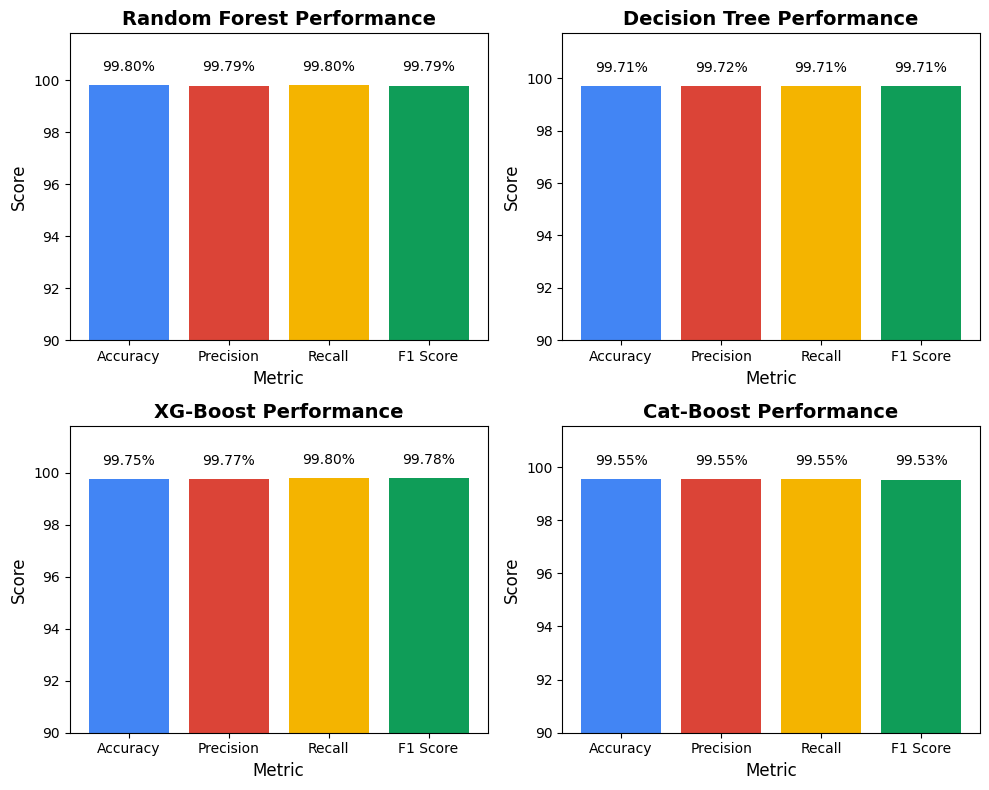

In [50]:
models = ['Random Forest', 'Decision Tree', 'XG-Boost', 'Cat-Boost']
random_forest = [99.80, 99.79, 99.80, 99.79]
decision_tree = [99.71, 99.72, 99.71, 99.71]
xgboost = [99.75, 99.77, 99.80, 99.78]
catboost = [99.55, 99.55, 99.55, 99.53]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [random_forest, decision_tree, xgboost, catboost]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (model, ax) in enumerate(zip(models, axs)):
    max_value = max(values[i]) + 2
    ax.bar(metrics, values[i], color=['#4285F4', '#DB4437', '#F4B400', '#0F9D58'])
    ax.set_title(f'{model} Performance', fontsize=14, fontweight='bold')
    ax.set_ylim(90, max_value)


    for j, v in enumerate(values[i]):
        ax.annotate(f'{v:.2f}%', xy=(j, v), xytext=(0, 8),
                    textcoords="offset points", ha='center', va='bottom', fontsize=10)

    ax.set_xlabel('Metric', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)

plt.tight_layout()
plt.show()